<a href="https://colab.research.google.com/github/hinatagagan/my_facebook/blob/main/Analysis_UK_Greenhouse_Gas_Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing  # For forecasting


In [2]:
file_path = "/content/atmoshpericemissionsghg.xlsx"


xls = pd.ExcelFile(file_path)

sheet_names = xls.sheet_names
print(sheet_names)


['Contents', 'GHG total ', 'CO2', 'CH4 ', 'N2O ', 'HFC', 'PFC', 'NF3', 'SF6']


In [3]:
data = pd.read_excel(xls, 'GHG total ', skiprows=3, nrows=24)
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1990,1991,1992,1993,1994,1995,1996,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,A,NaN,"Agriculture, forestry and fishing",55978.4,55808.5,55510.4,54725.4,55487.3,55391.7,56706.2,...,49671.9,48613.5,50571.8,51146.3,50534.4,51286.5,50557.7,50060.2,48500.2,50040.0
1,B,NaN,Mining and quarrying,50762.1,50877.2,51480.6,51092.0,44876.2,46739.8,46903.0,...,22281.0,20953.7,20887.3,22201.0,21100.3,21031.1,20790.9,20736.3,19135.7,17181.4
2,C,NaN,Manufacturing,176067.9,177032.4,170118.3,165079.3,168003.9,166085.4,167363.6,...,89688.4,92323.8,91436.1,88752.1,84312.4,85314.2,84017.6,83794.9,80927.2,81593.9
3,D,NaN,"Electricity, gas, steam and air conditioning s...",217638.6,214348.2,202484.4,185006.1,180725.0,178167.0,177971.4,...,178586.4,169386.4,148443.9,132014.9,110073.4,99866.9,95829.7,89371.3,80310.9,86080.9
4,E,NaN,"Water supply; sewerage, waste management and r...",75232.5,76756.7,76870.8,77189.4,77556.2,78634.3,79137.0,...,32164.5,29286.8,27392.9,27221.5,27117.4,28111.6,28407.5,27934.3,26552.4,26551.4
5,F,NaN,Construction,5786.8,5946.2,6058.3,6124.1,6391.0,6424.0,6677.6,...,8533.9,8430.5,8629.3,9185.6,9761.4,9913.5,10021.1,9925.4,9150.9,10196.5
6,G,NaN,Wholesale and retail trade; repair of motor ve...,12127.0,12490.8,12324.7,12571.6,12970.1,13152.4,13486.1,...,17650.2,17277.7,17099.7,17229.4,17487.3,17015.4,16542.8,16086.8,14267.5,14945.0
7,H,NaN,Transport and storage,66667.4,67119.0,68163.3,69528.8,70523.6,73415.5,79112.2,...,83237.3,80131.4,85013.2,86923.5,89634.3,83261.5,88024.5,86628.1,62349.6,56753.8
8,I,NaN,Accommodation and food services,3139.2,3550.4,3270.5,3475.9,3453.5,3560.8,3742.7,...,3598.9,3679.9,3270.0,3615.9,3708.0,3681.9,3641.4,3623.9,3112.6,3448.5
9,J,NaN,Information and communication,1199.4,1272.6,1241.8,1293.1,1336.3,1376.2,1379.5,...,994.7,944.7,901.2,908.7,931.9,887.3,839.4,833.8,698.4,771.2


there are many NaN values and 1st and second column and are of no use so need to delete the entire 2 column

**DATA** **CLEANING**

In [4]:
is_column_nan = data.iloc[:, 1].isnull().all()

print(is_column_nan) # checking if the second column is entirly null

True


In [5]:
data.drop(data.columns[[0, 1]], axis=1, inplace=True)


Now 1st Column is Unnamed so Renaming it as Industries for Better Understanding of the data

In [6]:
data.rename(columns={data.columns[0]: 'Industries'}, inplace=True)

# Rename the first column to 'Industries'


In [7]:
data.dropna(how='all', inplace=True)
data = data[~data.isnull().all(axis=1)]

In [8]:
data

,Industries,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"Agriculture, forestry and fishing",55978.4,55808.5,55510.4,54725.4,55487.3,55391.7,56706.2,56132.4,55674.8,...,49671.9,48613.5,50571.8,51146.3,50534.4,51286.5,50557.7,50060.2,48500.2,50040.0
1,Mining and quarrying,50762.1,50877.2,51480.6,51092.0,44876.2,46739.8,46903.0,46035.6,44644.9,...,22281.0,20953.7,20887.3,22201.0,21100.3,21031.1,20790.9,20736.3,19135.7,17181.4
2,Manufacturing,176067.9,177032.4,170118.3,165079.3,168003.9,166085.4,167363.6,166017.9,158150.0,...,89688.4,92323.8,91436.1,88752.1,84312.4,85314.2,84017.6,83794.9,80927.2,81593.9
3,"Electricity, gas, steam and air conditioning s...",217638.6,214348.2,202484.4,185006.1,180725.0,178167.0,177971.4,164572.8,170829.8,...,178586.4,169386.4,148443.9,132014.9,110073.4,99866.9,95829.7,89371.3,80310.9,86080.9
4,"Water supply; sewerage, waste management and r...",75232.5,76756.7,76870.8,77189.4,77556.2,78634.3,79137.0,77930.1,78942.1,...,32164.5,29286.8,27392.9,27221.5,27117.4,28111.6,28407.5,27934.3,26552.4,26551.4
5,Construction,5786.8,5946.2,6058.3,6124.1,6391.0,6424.0,6677.6,6914.9,7130.9,...,8533.9,8430.5,8629.3,9185.6,9761.4,9913.5,10021.1,9925.4,9150.9,10196.5
6,Wholesale and retail trade; repair of motor ve...,12127.0,12490.8,12324.7,12571.6,12970.1,13152.4,13486.1,13410.2,13778.1,...,17650.2,17277.7,17099.7,17229.4,17487.3,17015.4,16542.8,16086.8,14267.5,14945.0
7,Transport and storage,66667.4,67119.0,68163.3,69528.8,70523.6,73415.5,79112.2,88152.6,93145.3,...,83237.3,80131.4,85013.2,86923.5,89634.3,83261.5,88024.5,86628.1,62349.6,56753.8
8,Accommodation and food services,3139.2,3550.4,3270.5,3475.9,3453.5,3560.8,3742.7,3362.0,3542.4,...,3598.9,3679.9,3270.0,3615.9,3708.0,3681.9,3641.4,3623.9,3112.6,3448.5
9,Information and communication,1199.4,1272.6,1241.8,1293.1,1336.3,1376.2,1379.5,1314.1,1331.1,...,994.7,944.7,901.2,908.7,931.9,887.3,839.4,833.8,698.4,771.2


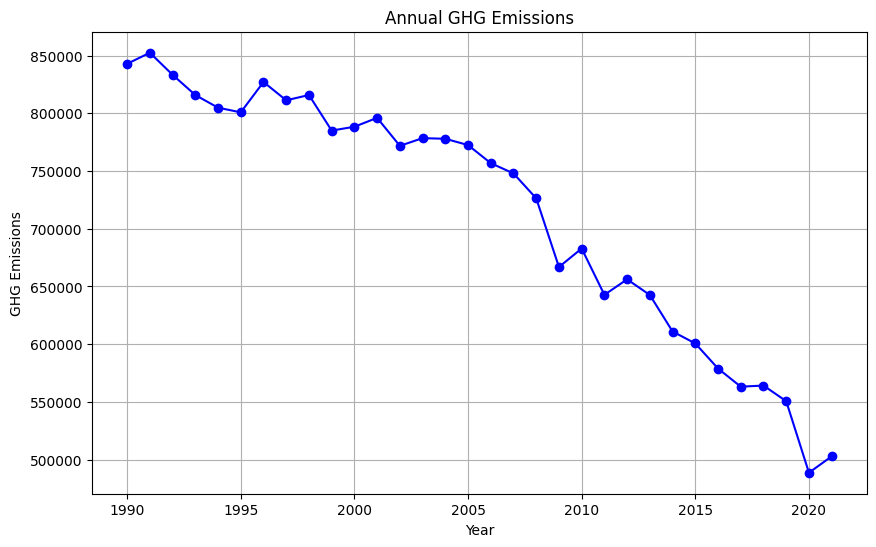

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(data.columns[1:], data.iloc[-1, 1:], marker='o', linestyle='-', color='b')
plt.title('Annual GHG Emissions')
plt.xlabel('Year')
plt.ylabel('GHG Emissions')
plt.grid(True)
plt.show()


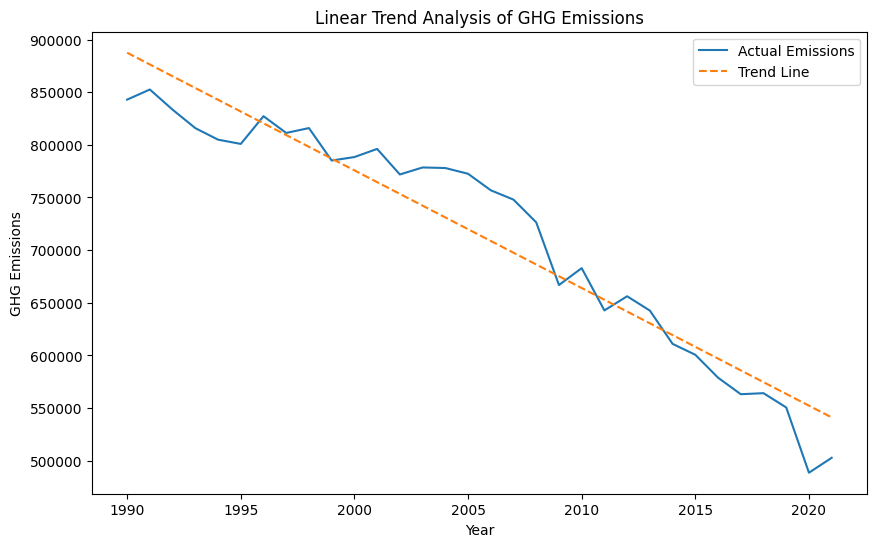

The trend indicates a decrease in emissions over time.


In [10]:
# Extracting years and emissions for analysis
years = range(1990, 2022)  # Assuming the years are from 1990 to 2021
emissions = data[data['Industries'] == 'Total greenhouse gas emissions'].iloc[:, 1:].values.flatten()

# Fitting a linear trend using numpy's polyfit
slope, intercept = np.polyfit(years, emissions, 1)
trend_line = slope * np.array(years) + intercept

# Plotting the emissions data with the trend line
plt.figure(figsize=(10, 6))
plt.plot(years, emissions, label='Actual Emissions')
plt.plot(years, trend_line, label='Trend Line', linestyle='--')
plt.title('Linear Trend Analysis of GHG Emissions')
plt.xlabel('Year')
plt.ylabel('GHG Emissions')
plt.legend()
plt.show()

# Determining the trend direction
if slope > 0:
    print("The trend indicates an increase in emissions over time.")
elif slope < 0:
    print("The trend indicates a decrease in emissions over time.")
else:
    print("The trend suggests a relatively constant level of emissions over time.")


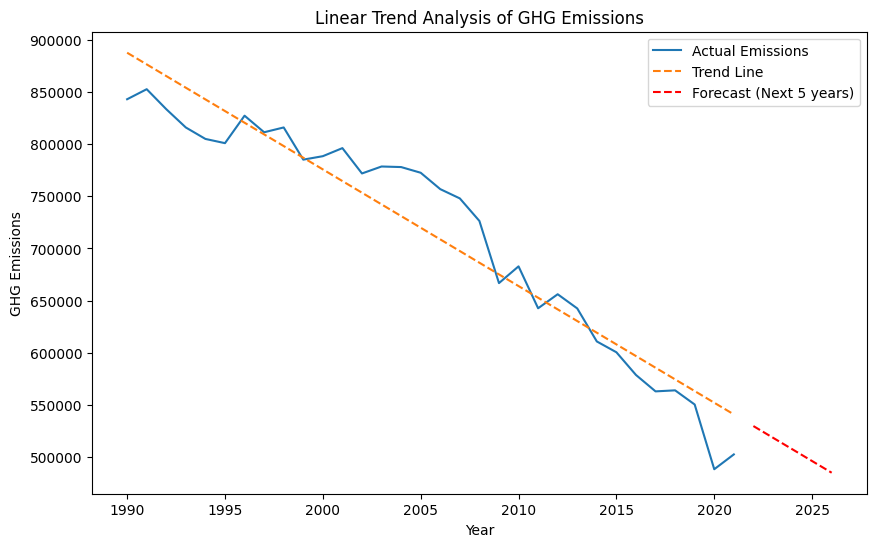

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Extracting years and emissions for analysis
years = np.arange(1990, 2022)  # Assuming the years are from 1990 to 2021
emissions = data[data['Industries'] == 'Total greenhouse gas emissions'].iloc[:, 1:].values.flatten()

# Fitting a linear trend using numpy's polyfit
slope, intercept = np.polyfit(years, emissions, 1)
trend_line = slope * years + intercept

# Plotting the emissions data with the trend line
plt.figure(figsize=(10, 6))
plt.plot(years, emissions, label='Actual Emissions')
plt.plot(years, trend_line, label='Trend Line', linestyle='--')
plt.title('Linear Trend Analysis of GHG Emissions')
plt.xlabel('Year')
plt.ylabel('GHG Emissions')
plt.legend()

# Extending the trend line for the next 5 years
future_years = np.arange(2022, 2027)  # Years for the next 5 years
future_trend_line = slope * future_years + intercept
plt.plot(future_years, future_trend_line, label='Forecast (Next 5 years)', linestyle='--', color='red')

plt.legend()
plt.show()


In [12]:
import pandas as pd

# Extracting emissions data for analysis
emissions = data[data['Industries'] == 'Total greenhouse gas emissions'].iloc[:, 1:].values.flatten()

# Convert emissions to a pandas Series
emissions_series = pd.Series(emissions)

# Calculate percentage change from year to year
percentage_change = emissions_series.pct_change() * 100

# Print or visualize the percentage change
print(percentage_change)


0           NaN
1      1.140277
2     -2.244942
3     -2.103185
4     -1.343296
5     -0.502765
6      3.285328
7     -1.919502
8      0.567584
9     -3.777500
10     0.421323
11     0.979507
12    -3.047858
13     0.863338
14    -0.069207
15    -0.700588
16    -2.030771
17    -1.173878
18    -2.886668
19    -8.194764
20     2.406313
21    -5.879294
22     2.090371
23    -2.071145
24    -4.921549
25    -1.693332
26    -3.620235
27    -2.715083
28     0.174764
29    -2.403764
30   -11.258486
31     2.904278
dtype: float64


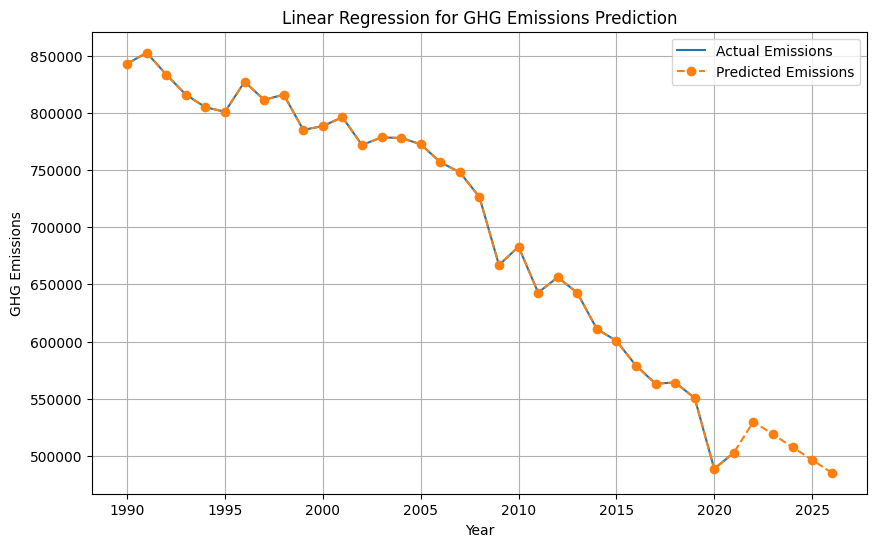

In [13]:
from sklearn.linear_model import LinearRegression

# Assuming 'data' is your DataFrame with emissions data
years = np.array(range(1990, 2022)).reshape(-1, 1)  # Assuming the years are from 1990 to 2021
emissions = data[data['Industries'] == 'Total greenhouse gas emissions'].iloc[:, 1:].values.flatten()

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(years, emissions)

# Making predictions for future years
future_years = np.array(range(2022, 2027)).reshape(-1, 1)
predicted_emissions = model.predict(future_years)

# Plotting the actual emissions and predicted values
plt.figure(figsize=(10, 6))
plt.plot(years, emissions, label='Actual Emissions')
plt.plot(np.concatenate((years, future_years)), np.concatenate((emissions, predicted_emissions)), linestyle='--', marker='o', label='Predicted Emissions')
plt.title('Linear Regression for GHG Emissions Prediction')
plt.xlabel('Year')
plt.ylabel('GHG Emissions')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
print("Predicted Emissions:")
for year, emission in zip(range(2022, 2027), predicted_emissions):
    print(f"Year: {year}, Predicted Emission: {emission}")


Predicted Emissions:
Year: 2022, Predicted Emission: 529944.6919354834
Year: 2023, Predicted Emission: 518771.25830278546
Year: 2024, Predicted Emission: 507597.82467008755
Year: 2025, Predicted Emission: 496424.39103738964
Year: 2026, Predicted Emission: 485250.9574046917


In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'years', 'emissions', and 'predicted_emissions' are defined from the previous code snippet

# Calculate MSE and RMSE
mse = mean_squared_error(emissions, model.predict(years))
rmse = np.sqrt(mse)

# Calculate R2 score
r2 = r2_score(emissions, model.predict(years))

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 score): {r2}")


Mean Squared Error (MSE): 926739844.3585908
Root Mean Squared Error (RMSE): 30442.4020793135
R-squared (R2 score): 0.9199002980719885


In [16]:
# Include your findings and model evaluations in a written summary
print("Summary of Findings:")
print("- Observations made from visualizations")
print("- Trends observed in GHG emissions over time")
print("- Insights gained from the trend analysis and forecasting")
print("\nModel Evaluations:")
print(f"R-squared (R2 score): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
# Add more details based on your observations and analysis


Summary of Findings:
- Observations made from visualizations
- Trends observed in GHG emissions over time
- Insights gained from the trend analysis and forecasting

Model Evaluations:
R-squared (R2 score): 0.9199002980719885
Root Mean Squared Error (RMSE): 30442.4020793135


---------------------------------------------------------------------------

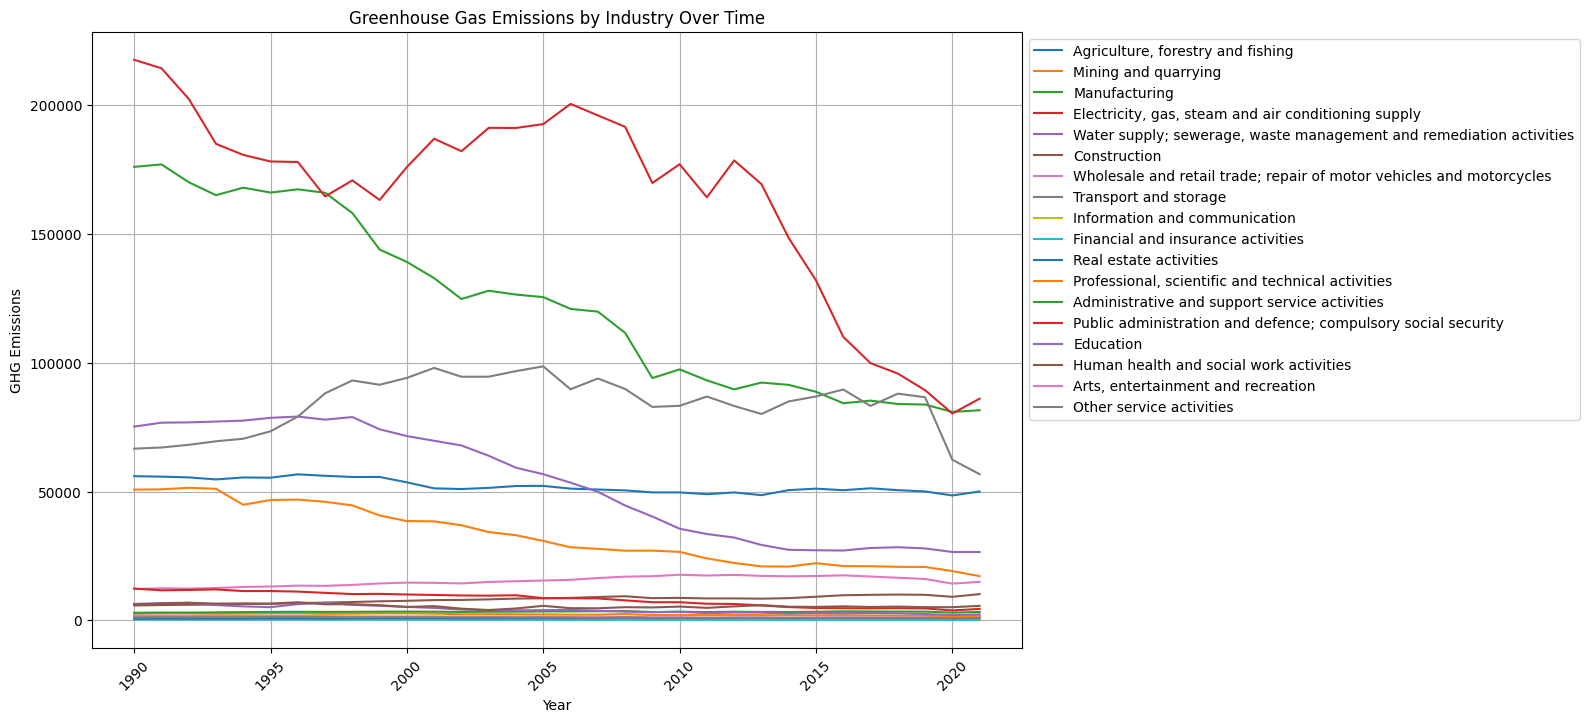

In [17]:
# Extracting data for different industries
industry_names = ['Agriculture, forestry and fishing', 'Mining and quarrying', 'Manufacturing', 'Electricity, gas, steam and air conditioning supply', 'Water supply; sewerage, waste management and remediation activities', 'Construction', 'Wholesale and retail trade; repair of motor vehicles and motorcycles', 'Transport and storage', 'Accommodation and food service activities', 'Information and communication', 'Financial and insurance activities', 'Real estate activities', 'Professional, scientific and technical activities', 'Administrative and support service activities', 'Public administration and defence; compulsory social security', 'Education', 'Human health and social work activities', 'Arts, entertainment and recreation', 'Other service activities', 'Activities of households as employers; undifferentiated goods']
industry_emissions = data[data['Industries'].isin(industry_names)].set_index('Industries').T

# Plotting emissions for different industries over time
plt.figure(figsize=(12, 8))
for industry in industry_emissions.columns:
    plt.plot(industry_emissions.index, industry_emissions[industry], label=industry)

plt.title('Greenhouse Gas Emissions by Industry Over Time')
plt.xlabel('Year')
plt.ylabel('GHG Emissions')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


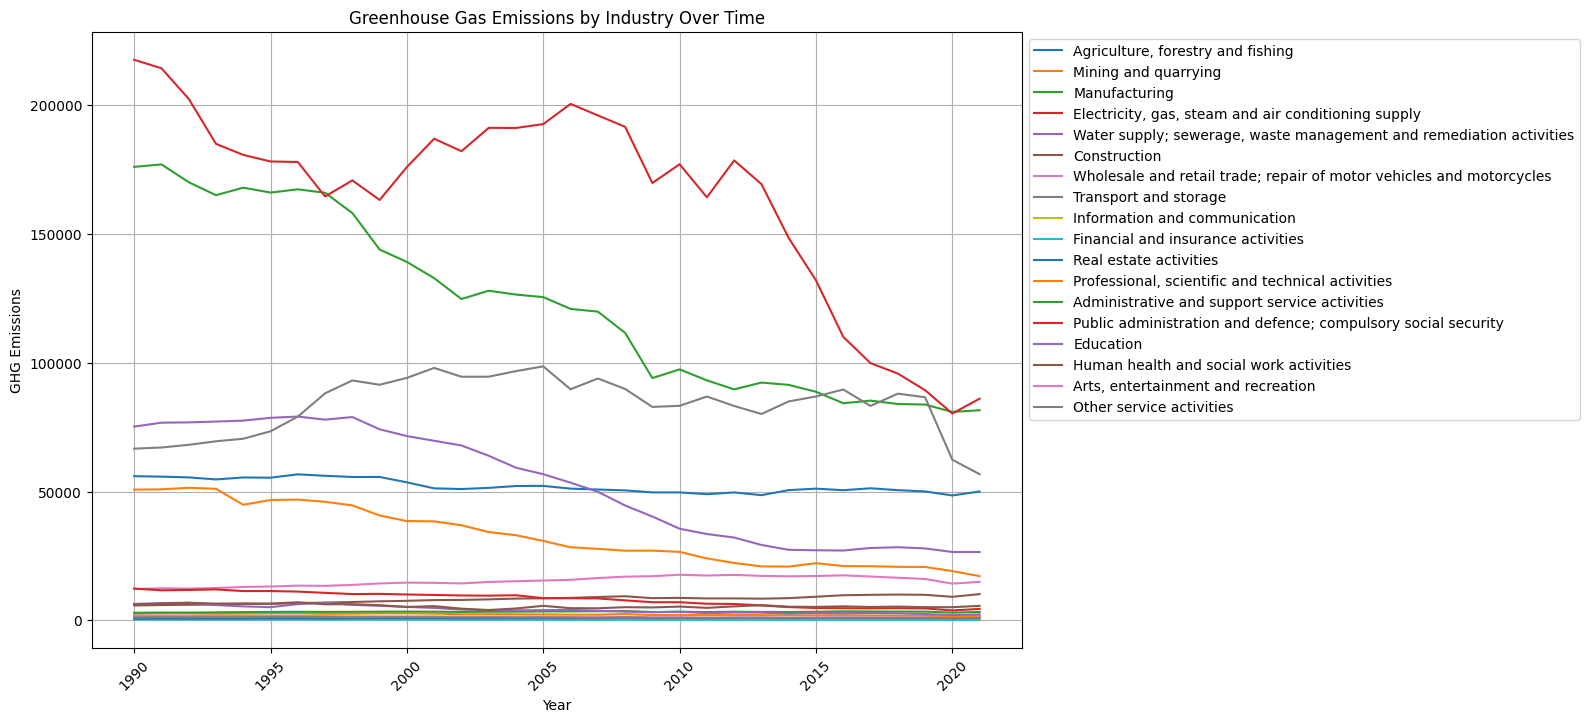

In [18]:
# Extracting data for different industries
industry_names = ['Agriculture, forestry and fishing', 'Mining and quarrying', 'Manufacturing', 'Electricity, gas, steam and air conditioning supply', 'Water supply; sewerage, waste management and remediation activities', 'Construction', 'Wholesale and retail trade; repair of motor vehicles and motorcycles', 'Transport and storage', 'Accommodation and food service activities', 'Information and communication', 'Financial and insurance activities', 'Real estate activities', 'Professional, scientific and technical activities', 'Administrative and support service activities', 'Public administration and defence; compulsory social security', 'Education', 'Human health and social work activities', 'Arts, entertainment and recreation', 'Other service activities', 'Activities of households as employers; undifferentiated goods']
industry_emissions = data[data['Industries'].isin(industry_names)].set_index('Industries').T

# Plotting emissions for different industries over time
plt.figure(figsize=(12, 8))
for industry in industry_emissions.columns:
    plt.plot(industry_emissions.index, industry_emissions[industry], label=industry)

plt.title('Greenhouse Gas Emissions by Industry Over Time')
plt.xlabel('Year')
plt.ylabel('GHG Emissions')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Identify High-Impact Sectors: Determine sectors that contribute the most to emissions. Your analysis should highlight industries with high emissions and trends over time.

Focus on Renewable Energy: Promote a shift toward renewable energy sources. Identify sectors currently relying on high-emission sources and propose strategies to transition them to renewable energy alternatives.


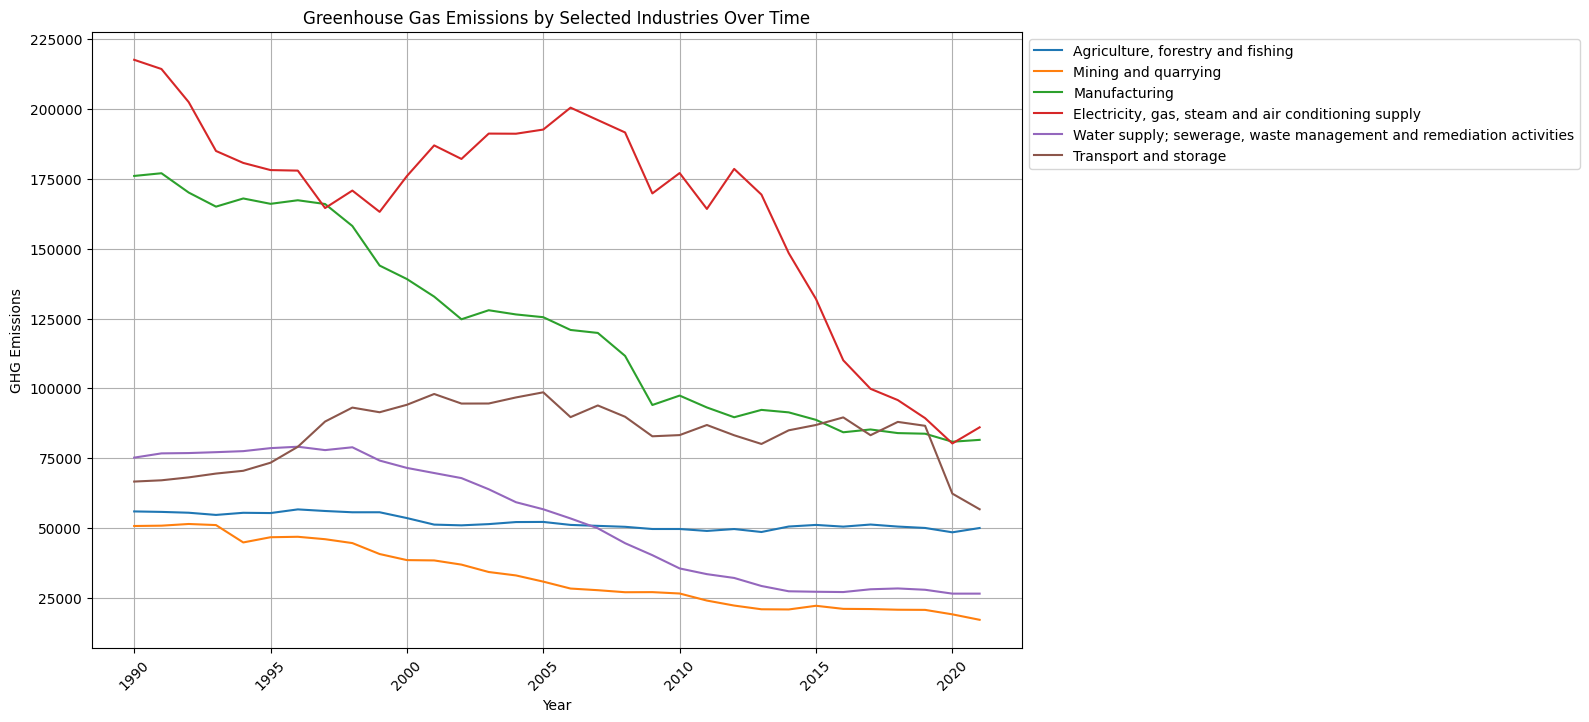

In [30]:
# Industries to analyze
selected_industries = ['Agriculture, forestry and fishing', 'Transport and storage', 'Manufacturing','Electricity, gas, steam and air conditioning supply',
                       'Water supply; sewerage, waste management and remediation activities','Mining and quarrying',
                       'Public administration and defence; compulsory social security, scientific and technical activities']

# Extracting data for selected industries
selected_emissions = data[data['Industries'].isin(selected_industries)].set_index('Industries').T

# Plotting emissions for selected industries over time
plt.figure(figsize=(12, 8))
for industry in selected_emissions.columns:
    plt.plot(selected_emissions.index, selected_emissions[industry], label=industry)

plt.title('Greenhouse Gas Emissions by Selected Industries Over Time')
plt.xlabel('Year')
plt.ylabel('GHG Emissions')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Electricity, gas, steam and air conditioning supply  - has

----------------------------------------------------------------------

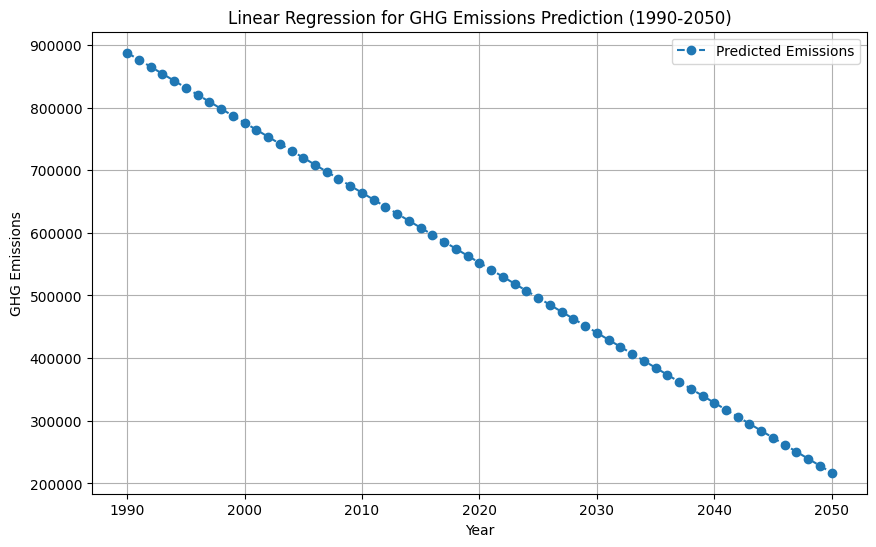

In [26]:
# Assuming 'data' is your DataFrame with emissions data
years = np.array(range(1990, 2051)).reshape(-1, 1)  # Assuming the years are from 1990 to 2050

# Making predictions for future years up to 2050
predicted_emissions = model.predict(years)

# Plotting the actual emissions and predicted values from 1990 to 2050
plt.figure(figsize=(10, 6))
plt.plot(years, predicted_emissions, linestyle='--', marker='o', label='Predicted Emissions')
plt.title('Linear Regression for GHG Emissions Prediction (1990-2050)')
plt.xlabel('Year')
plt.ylabel('GHG Emissions')
plt.legend()
plt.grid(True)
plt.show()
